# Exploring Top 7 S&P 500 Stocks Using Python

## Fetching and Processing Historical Stock Data (Last 3 months) from Yahoo Finance

In [1]:
import pandas as pd
import numpy as np

This line imports the pandas and numpy libraries, which are powerful tools for data manipulation and analysis in Python.

In [2]:
tickers = ['AMZN', 'TSLA', 'NVDA', 'AAPL', 'MSFT', 'META', 'BRK-B']

This line creates a list named tickers containing the stock symbols (tickers) for several companies: Amazon (AMZN), Tesla (TSLA), NVIDIA (NVDA), Apple (AAPL), Microsoft (MSFT), Meta Platforms (META), and Berkshire Hathaway (BRK-B).

In [3]:
dataset = {}

This line initializes an empty dictionary named dataset. The dictionary will be used to store dataframes of stock data for each ticker.

In [4]:
for ticker in tickers:
    df = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1=1710996234&period2=1718944971&interval=1d&events=history&includeAdjustedClose=true')
    df['ticker'] = ticker
    dataset[ticker] = df

These line starts a loop that will iterate through each ticker in the tickers list and constructs a URL to download historical stock data from Yahoo Finance for the current ticker using the specified time period and interval. It then reads the data into a pandas DataFrame named df. Then it will add a new column named 'ticker' to the DataFrame df, setting its value to the current ticker.
After that is stores the DataFrame df in the dataset dictionary using the ticker as the key.

In [5]:
stock_data = pd.concat(dataset)

This line concatenates all the DataFrames stored in the dataset dictionary into a single DataFrame named stock_data.

In [6]:
stock_data = stock_data.reset_index(drop=True)
print(stock_data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2024-03-21  179.990005  181.419998  178.149994  178.149994  178.149994   
1  2024-03-22  177.750000  179.259995  176.750000  178.869995  178.869995   
2  2024-03-25  178.009995  180.990005  177.240005  179.710007  179.710007   
3  2024-03-26  180.149994  180.449997  177.949997  178.300003  178.300003   
4  2024-03-27  179.880005  180.000000  177.309998  179.830002  179.830002   

     Volume ticker  
0  32824300   AMZN  
1  27964100   AMZN  
2  29815500   AMZN  
3  29659000   AMZN  
4  33272600   AMZN  


This line prints the stock_data DataFrame to the console, displaying the combined historical stock data for all the tickers.

## Price Trends Over Time
The following lines of code plots the closing prices over time for each stock to visualize trends.

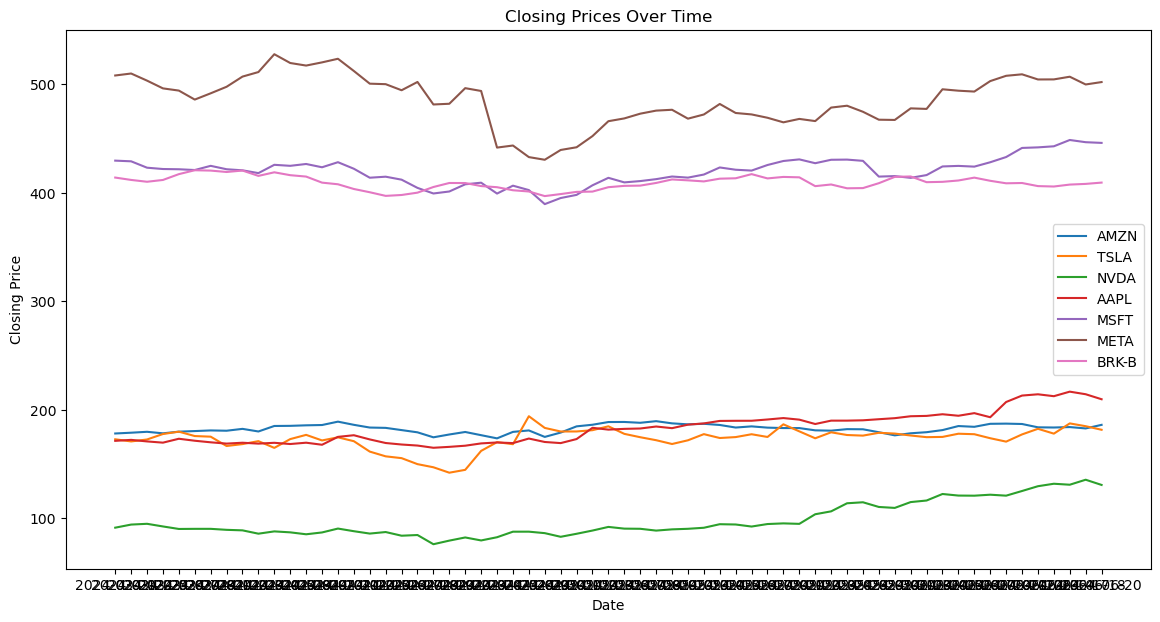

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for ticker in tickers:
    df = stock_data[stock_data['ticker'] == ticker]
    plt.plot(df['Date'], df['Close'], label=ticker)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.legend()
plt.show()

## Calculating the Daily Returns and Plotting it on a Histogram
The following lines are helping us understand the distribution of daily returns for different stocks, showing how often certain return values occur.

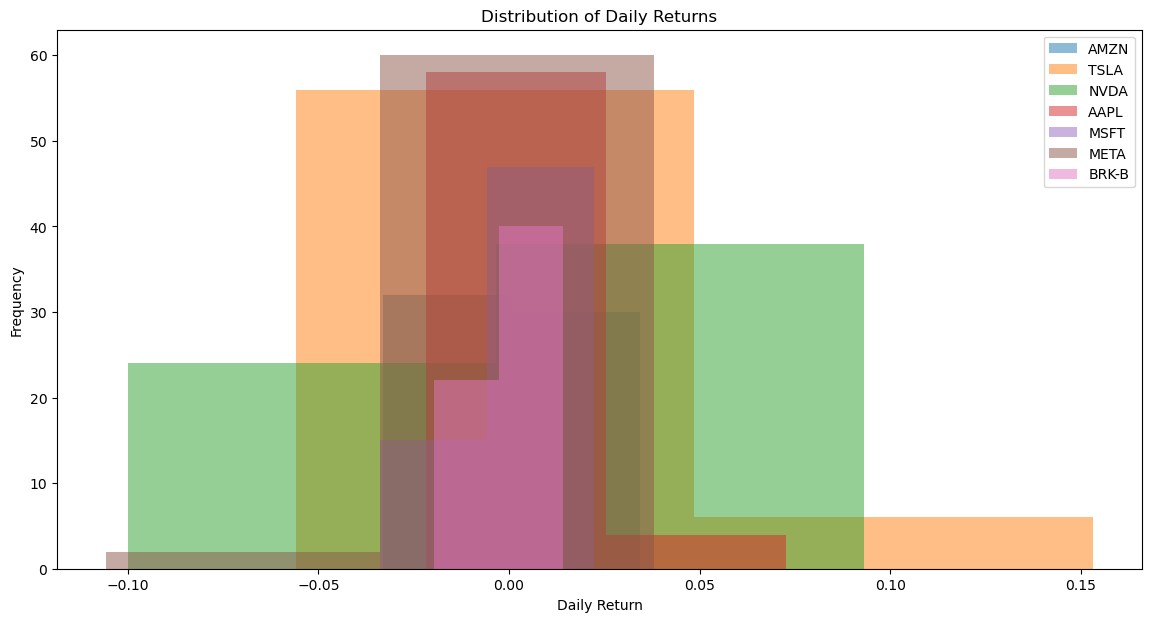

In [11]:
stock_data['Daily Return'] = stock_data.groupby('ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    df = stock_data[stock_data['ticker'] == ticker]
    plt.hist(df['Daily Return'].dropna(), bins=2, alpha=0.5, label=ticker)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.legend()
plt.show() 

## Correlation Analysis
These lines are calculating correlation between the stocks to understand their relationship. Uses of correlation analysis includes but not limited to: Diversify portfolios. By combining stocks that are not highly correlated (or negatively correlated), they can reduce risk.

ticker      AAPL      AMZN     BRK-B      META      MSFT      NVDA      TSLA
ticker                                                                      
AAPL    1.000000  0.363988  0.048355  0.055773  0.678556  0.906386  0.515598
AMZN    0.363988  1.000000  0.064923  0.242311  0.369611  0.196546  0.282027
BRK-B   0.048355  0.064923  1.000000  0.371429  0.382813  0.066605  0.104399
META    0.055773  0.242311  0.371429  1.000000  0.608448  0.212158 -0.279770
MSFT    0.678556  0.369611  0.382813  0.608448  1.000000  0.721310  0.359722
NVDA    0.906386  0.196546  0.066605  0.212158  0.721310  1.000000  0.457880
TSLA    0.515598  0.282027  0.104399 -0.279770  0.359722  0.457880  1.000000


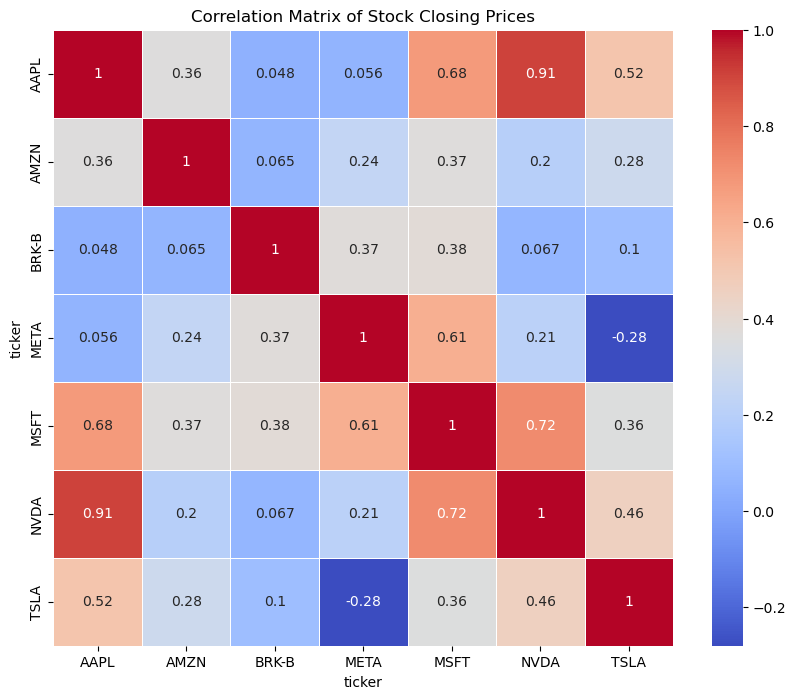

In [9]:
pivot_data = stock_data.pivot(index='Date', columns='ticker', values='Close')
correlation_matrix = pivot_data.corr()

print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()

## Volatility Analysis 
These lines are measuring the volatility of each stock based on daily returns.

ticker
AAPL     0.017328
AMZN     0.013189
BRK-B    0.007217
META     0.020548
MSFT     0.011898
NVDA     0.031993
TSLA     0.036713
Name: Daily Return, dtype: float64


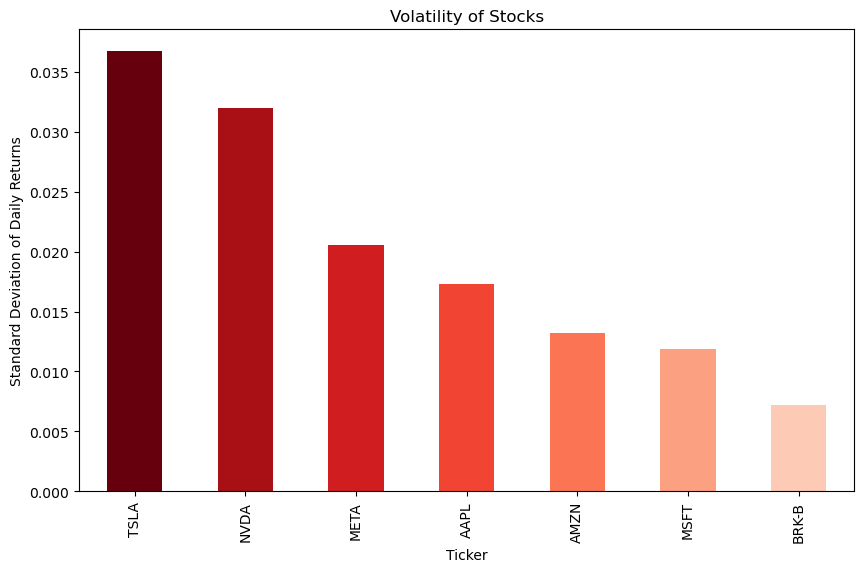

In [10]:
volatility = stock_data.groupby('ticker')['Daily Return'].std()
print(volatility)

volatility_sorted = volatility.sort_values(ascending=False)
colors = plt.cm.Reds(np.linspace(1, 0.2, len(volatility_sorted))) 
plt.figure(figsize=(10, 6))

volatility_sorted.plot(kind='bar', color=colors)

plt.title('Volatility of Stocks')
plt.xlabel('Ticker')
plt.ylabel('Standard Deviation of Daily Returns')
plt.show()